In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/rainpre/Rain Prediction Train.csv


In [2]:
df = pd.read_csv("../input/rainpre/Rain Prediction Train.csv")

**Veri Analizi**

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Sunshine,Humidity9am,Humidity3pm,RainToday
0,07/02/14,CoffsHarbour,17.7,25.9,2.2,NaN,76.0,66.0,Yes
1,23/04/09,Portland,6.7,22.0,0.0,0.4,65.0,37.0,No
2,08/11/15,Watsonia,6.2,25.7,0.0,10.9,71.0,28.0,No
3,21/11/12,Wollongong,13.8,22.8,0.0,NaN,65.0,76.0,No
4,30/07/13,Townsville,13.4,27.2,0.0,10.2,61.0,46.0,No


In [4]:
df.shape

(100000, 9)

In [5]:
df.dtypes

Date            object
Location        object
MinTemp        float64
MaxTemp        float64
Rainfall       float64
Sunshine       float64
Humidity9am    float64
Humidity3pm    float64
RainToday       object
dtype: object

In [6]:
# Sınıflandırma için kullanılmayacak niteliklerin veri setinden çıkarılması
df = df.drop(["Date"], axis=1)

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Sunshine,Humidity9am,Humidity3pm
count,99564.000000,99784.000000,99030.000000,52518.000000,98762.000000,97456.000000
mean,12.190559,23.228404,2.346882,7.627004,68.845599,51.491155
std,6.412850,7.117851,8.357515,3.783709,19.064754,20.824180
min,-8.500000,-4.800000,0.000000,0.000000,1.000000,0.000000
25%,7.600000,17.900000,0.000000,4.900000,57.000000,37.000000
50%,12.000000,22.600000,0.000000,8.500000,70.000000,52.000000
75%,16.900000,28.200000,0.600000,10.600000,83.000000,66.000000
max,33.900000,47.300000,278.400000,14.500000,100.000000,100.000000


Text(0.5, 1.0, 'Watsonia nem-yağış')

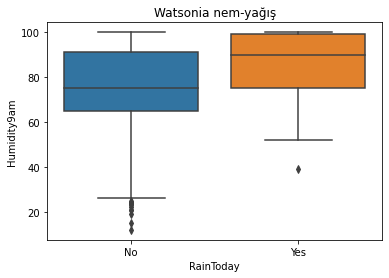

In [8]:
sns.boxplot(x = 'RainToday', y = 'Humidity9am', data = df[df["Location"] == "Watsonia"]).set_title("Watsonia nem-yağış")

Text(0.5, 1.0, 'Newcastle and Sydney nem-yağış')

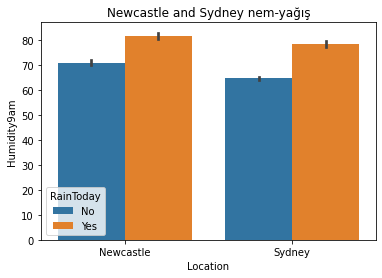

In [9]:
sns.barplot(x = 'Location', y = 'Humidity9am', data = df[np.logical_or(df["Location"] == "Newcastle", df["Location"] == "Sydney")], hue = 'RainToday').set_title("Newcastle and Sydney nem-yağış")


*Data Pre-processing*

In [10]:
df.isnull().sum()  # Eksik veri kontrolü

Location           0
MinTemp          436
MaxTemp          216
Rainfall         970
Sunshine       47482
Humidity9am     1238
Humidity3pm     2544
RainToday        970
dtype: int64

In [11]:
df['RainToday'].value_counts() # Bir nitelik için En sık geçen sınıfı bulma

No     76973
Yes    22057
Name: RainToday, dtype: int64

In [12]:
df['RainToday'] = df['RainToday'].fillna("no") # Eksik verileri sabit bir değer ile tamamlama

In [13]:
from sklearn.preprocessing import LabelEncoder # Kategorik verileri dönüştürme

In [14]:
LE = LabelEncoder()
df['Location_Cat'] = LE.fit_transform(df['Location'])
df['RainToday_Cat'] = LE.fit_transform(df['RainToday'])


In [15]:
df.drop(["RainToday","Location"], axis=1, inplace=True)

In [16]:
 from sklearn.impute import KNNImputer  # Eksik verileri KNN algoritması ile tamamlama
 imputer = KNNImputer(missing_values=np.nan,n_neighbors=5)
 imputer.fit(df)
 df[:] = imputer.transform(df)

In [17]:
from sklearn.preprocessing import KBinsDiscretizer # Sürekli Verileri düzleştirme

In [18]:
Xbin = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile') # humidity değerlerini 5 değerden oluşan kategorik veriye dönüştürme
df["Humidity9am"] = Xbin.fit_transform(df[["Humidity9am"]])
df["Humidity3pm"] = Xbin.fit_transform(df[["Humidity3pm"]])

In [19]:
df ## Makine Öğrenimi Algoritmasının uygulanacağı veri seti

,MinTemp,MaxTemp,Rainfall,Sunshine,Humidity9am,Humidity3pm,Location_Cat,RainToday_Cat
0,17.70,25.9,2.2,6.12,3.0,3.0,11.0,1.0
1,6.70,22.0,0.0,0.40,2.0,1.0,33.0,0.0
2,6.20,25.7,0.0,10.90,2.0,0.0,44.0,0.0
3,13.80,22.8,0.0,2.94,2.0,4.0,47.0,0.0
4,13.40,27.2,0.0,10.20,1.0,1.0,39.0,0.0
...,...,...,...,...,...,...,...,...
99995,17.60,34.4,0.0,12.90,0.0,0.0,3.0,0.0
99996,10.20,15.9,0.0,3.80,1.0,1.0,18.0,0.0
99997,17.10,26.4,0.0,5.20,0.0,3.0,38.0,0.0
99998,12.08,17.9,0.8,2.10,3.0,4.0,1.0,0.0


**Prepare train & test set**

In [20]:
X = df.loc[:,:"Location_Cat"]  # Sadece niteliklerden oluşan Veriseti
y = df.loc[:,"RainToday_Cat"] # Sınıf etiketi

In [21]:
#Veri seti %70 train, %30 test olarak bölmek
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

**NaiveBayes**

In [22]:
from sklearn.naive_bayes import GaussianNB 
nby = GaussianNB()

nby.fit(X_train, y_train)

GaussianNB()

In [23]:
model = nby.predict(X_test)
model

array([0., 0., 0., ..., 1., 0., 0.])

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
ac = accuracy_score(y_test, model) 
ac

0.9492666666666667

*NaiveBayes Sınıflandırıcı Modelin kaydedilip tekrar kullanılması*

In [26]:
import pickle
with open('nbmodel.pkl', 'wb') as f:
        pickle.dump(nby, f)

In [27]:
nby2 = pickle.load(open('nbmodel.pkl', 'rb'))
model2 = nby2.predict(X_test)

In [28]:
# Modelin tahmin doğruluğunun gösterilmesi
ac2 = accuracy_score(y_test, model2)
ac2

0.9492666666666667

*NaiveBayes Sonuçların Karmaşıklık Matrisi üzerinde gösterilmesi*

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model2, labels=[0,1])

array([[22224,   830],
       [    0,  6237]])

**KNN**

In [30]:
from sklearn.neighbors import KNeighborsClassifier # KNN algoritması ---------------------------------------------------
kn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

kn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [31]:
model = kn.predict(X_test)
model

array([0., 0., 0., ..., 0., 0., 0.])

In [32]:
ac = accuracy_score(y_test, model) 
ac

0.9578

*KNN Sınıflandırıcı Modelin kaydedilip tekrar kullanılması*

In [33]:
import pickle
with open('knmodel.pkl', 'wb') as f:
        pickle.dump(kn, f)

In [34]:
kn2 = pickle.load(open('nbmodel.pkl', 'rb'))
modedl2 = kn2.predict(X_test)

In [35]:
# Modelin tahmin doğruluğunun gösterilmesi
ac2 = accuracy_score(y_test, model2)
ac2

0.9492666666666667

*KNN Sonuçların Karmaşıklık Matrisi üzerinde gösterilmesi*

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model2, labels=[0,1])

array([[22224,   830],
       [    0,  6237]])

**Decision Tree ALGORITHM**

In [37]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
model = dt.predict(X_test)
model

array([0., 0., 0., ..., 0., 0., 0.])

In [39]:
ac = accuracy_score(y_test, model) 
ac

0.9824333333333334

*Decision Tree Sınıflandırıcı Modelin kaydedilip tekrar kullanılması* 

In [40]:
import pickle
with open('dtmodel.pkl', 'wb') as f:
        pickle.dump(dt, f)

In [41]:
dt2 = pickle.load(open('dtmodel.pkl', 'rb'))
modedl2 = dt2.predict(X_test)

In [42]:
# Modelin tahmin doğruluğunun gösterilmesi
ac2 = accuracy_score(y_test, model2)
ac2

0.9492666666666667

*Decision Tree Sonuçların Karmaşıklık Matrisi üzerinde gösterilmesi*

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model2, labels=[0,1])

array([[22224,   830],
       [    0,  6237]])